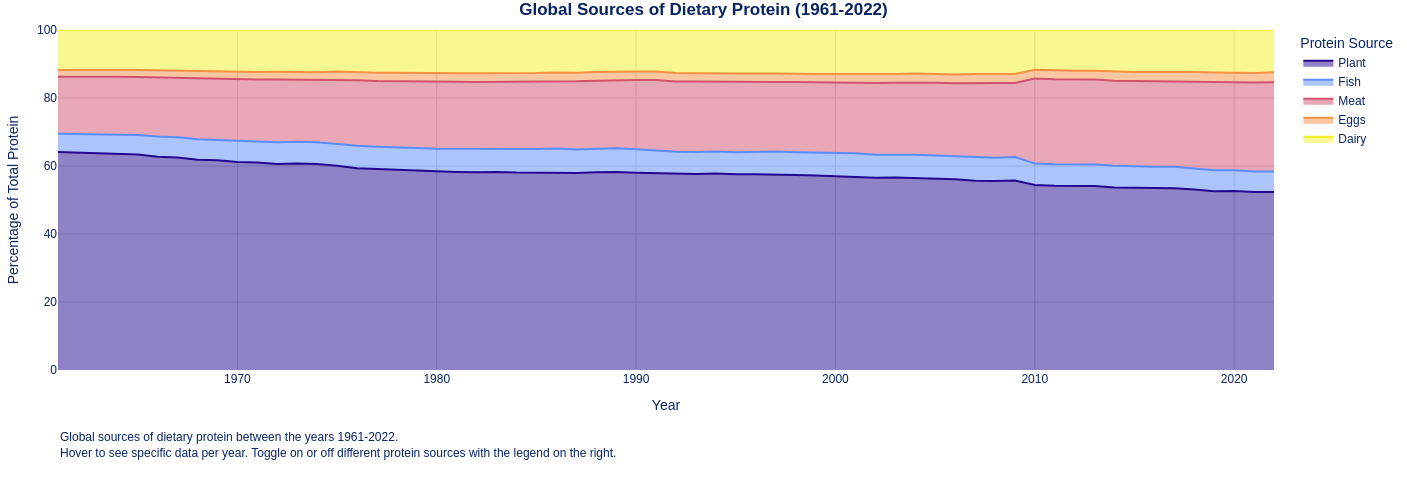

In [29]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('../data/per-capita-sources-of-protein.csv')

df.columns = [col.split('|')[0].strip() for col in df.columns]

protein_cols = [
    'Vegetal Products',
    'Fish and seafood',
    'Meat, total',
    'All egg products',
    'Milk'
]

df = df.dropna(subset=protein_cols)

df_world = df.groupby('Year')[protein_cols].sum().reset_index()

df_world['Total'] = df_world[protein_cols].sum(axis=1)

for col in protein_cols:
    df_world[col] = df_world[col] / df_world['Total'] * 100

df_world = df_world.rename(columns={
    'Vegetal Products': 'Plant',
    'Fish and seafood': 'Fish',
    'Meat, total': 'Meat',
    'All egg products': 'Eggs',
    'Milk': 'Dairy'
})

fig = px.area(
    df_world,
    x='Year',
    y=['Plant', 'Fish', 'Meat', 'Eggs', 'Dairy'],
    labels={
        'value': 'Percentage of Total Protein',
        'Year': 'Year',
        'variable': 'Protein Source'
    },
    color_discrete_sequence=['#230790', '#5b8cff', '#D2516F', '#F79043', '#F4EF22']
)

fig.update_traces(
    hovertemplate="<b>%{fullData.name}</b><br>%{y:.1f}%<extra></extra>",
    opacity=1
)

fig.update_layout(
    hovermode='x unified',
    legend_title_text='Protein Source',
    plot_bgcolor='white',
    yaxis=dict(
        title='Percentage of Total Protein',
        range=[0, 100],
        gridcolor='lightgray'
    ),
    xaxis=dict(
        title='Year',
        gridcolor='lightgray'
    ),
    margin={'l': 30, 'b': 130, 'r': 30, 't': 30},
    title={
        'text': '<b>Global Sources of Dietary Protein (1961-2022)</b>',
        'x': 0.5,
        'xanchor': 'center'}, 
    font=dict(color='#0a2463'),
    height=500
)

fig.add_annotation(x=0, y=-0.27,
                   xref="paper", yref="paper",
                   showarrow=False,
                   align='left',
                   xanchor='left', yanchor='bottom',
                   text="Global sources of dietary protein between the years 1961-2022. <br>" + \
                        'Hover to see specific data per year. Toggle on or off different protein sources with the legend on the right.')

fig.update_annotations(
    font=dict(color='#0a2463')
)

fig.show()